<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_09/04_Zero_Shot_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Install CLIP

In [1]:
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git
!pip install -q transformers

import torch
import clip
from PIL import Image
import requests
from io import BytesIO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00


## Step 2: Import & Load CLIP

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:09<00:00, 38.3MiB/s]


## Step 3: Load CIFAR-10 Dataset

In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

# CIFAR10 has classes like airplane, car, bird, cat, deer, dog, etc.
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToPILImage()
])

cifar10 = datasets.CIFAR10(root="./data", train=False, download=True)
dataloader = DataLoader(cifar10, batch_size=1, shuffle=False)

Files already downloaded and verified


## Step 4: Define CLIP Prompts

In [7]:
text_labels = [
    "a photo of an airplane",
    "a photo of a car",
    "a photo of a bird",
    "a photo of a cat",
    "a photo of a deer",
    "a photo of a dog",
    "a photo of a frog",
    "a photo of a horse",
    "a photo of a ship",
    "a photo of a truck"
]

text_inputs = torch.cat([clip.tokenize(label) for label in text_labels]).to(device)

## Step 5: Run Zero-Shot Prediction on First 5 Images

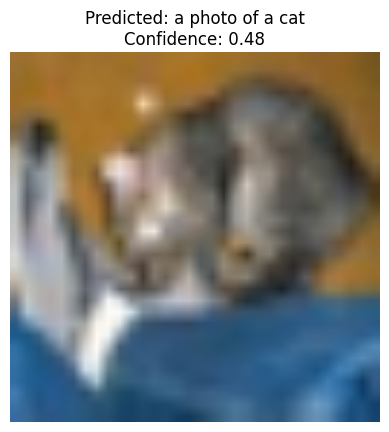

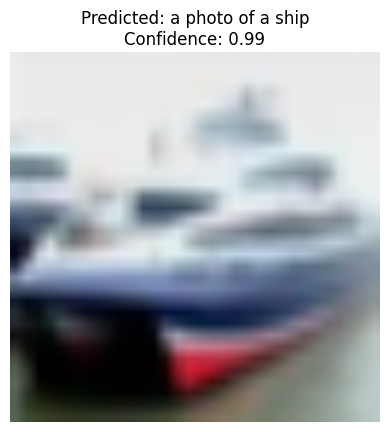

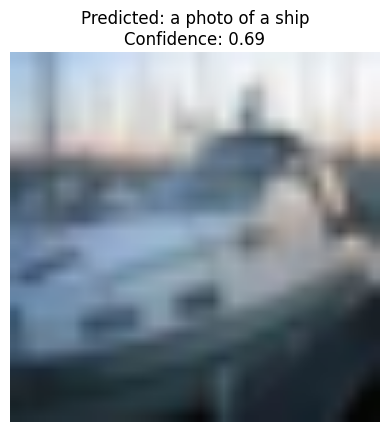

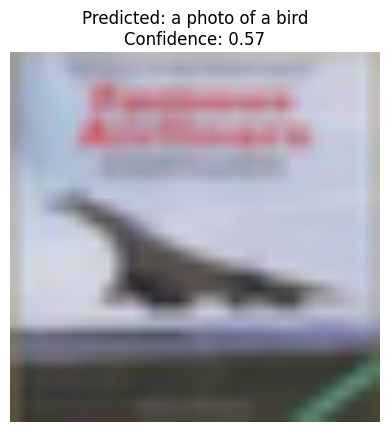

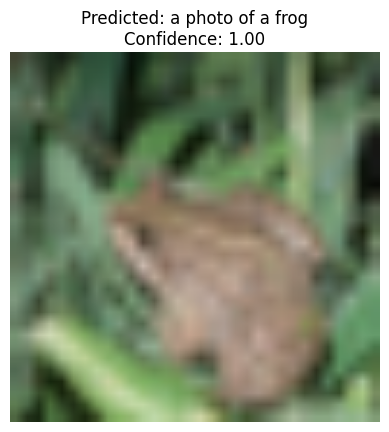

In [11]:
import matplotlib.pyplot as plt
import numpy as np

for idx, (img_tensor, true_label) in enumerate(dataloader):
    if idx == 5:
        break

    pil_img = resize_to_pil(img_tensor[0])  # Convert to PIL
    image_input = preprocess(pil_img).unsqueeze(0).to(device)

    # CLIP prediction
    with torch.no_grad():
        logits_per_image, _ = model(image_input, text_inputs)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    predicted = text_labels[np.argmax(probs)]
    confidence = np.max(probs)

    plt.imshow(pil_img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted}\nConfidence: {confidence:.2f}")
    plt.show()
